### threshold random walk

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step():
    return 1 if random.random()>0.5 else -1

def walk(n):
    x=np.zeros(n)
    dx=1/n
    for i in range(n-1):
        x_new=x[i]+dx*step()
        if x_new>5e-3:
            x[i+1]=0
        else:
            x[i+1]=x_new
    return x    

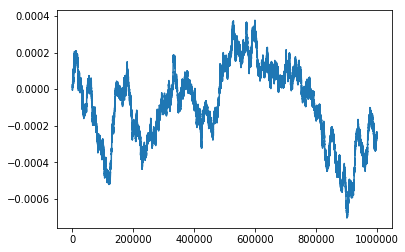

In [3]:
N=1000000
x=walk(N)
plt.plot(x)

In [4]:
%timeit -r 2 walk(N)

483 ms ± 1.03 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


### threshold random walk with `numba`

In [5]:
from numba import jit

In [6]:
@jit(nopython=True)
def step_numba():
    return 1 if random.random()>0.5 else -1

@jit(nopython=True)
def walk_numba(n):
    x=np.zeros(n)
    dx=1/n
    for i in range(n-1):
        x_new=x[i]+dx*step_numba()
        if x_new>5e-3:
            x[i+1]=0
        else:
            x[i+1]=x_new
    return x    

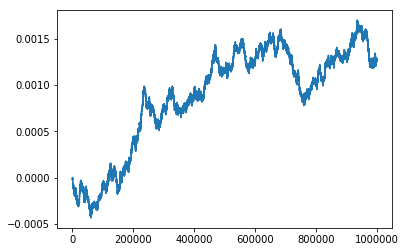

In [7]:
numba_x=walk_numba(N)
plt.plot(numba_x)

In [8]:
%timeit -r 2 walk_numba(N)

19.8 ms ± 64.6 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


### threshold random walk with cython

In [9]:
%load_ext cython

In [10]:
%%cython -a

# cimport statement that accesses C-level constructs and it occurs at compiled time
# import statement that accesses pure-Python API and it occurs at runtime
cimport numpy as np
import numpy as np

# np.double_t为的是declaration; np.double为的是initialization
ctypedef np.double_t DTYPE_t # numpy c level 64-bit float type
DTYPE=np.double # python level 64-bit float type

from libc.stdlib cimport rand, RAND_MAX
from libc.math cimport round

cdef double step_cython():
    return 2 * round(float(rand()) / RAND_MAX) - 1

def sum_cython(int n):
    cdef int i
    cdef double dx=1.0/n
    cdef double x_new
    cdef np.ndarray[DTYPE_t, ndim=1] x=np.zeros(n, dtype=DTYPE)
    
    for i in range(n-1):
        x_new=x[i]+dx*step_cython()
        if x_new>5e-3:
            x[i+1]=0
        else:
            x[i+1]=x_new
    return x

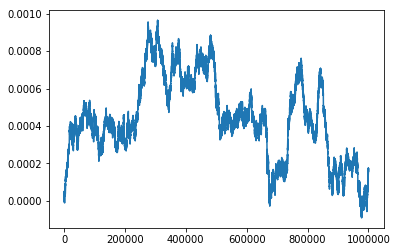

In [11]:
cython_x=sum_cython(N)
plt.plot(cython_x)

In [12]:
%timeit -r 2 sum_cython(N)

43 ms ± 11.5 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


### brownian random walk with `np.cumsum()`

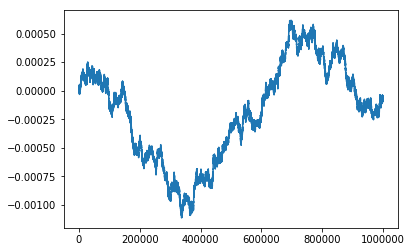

In [13]:
steps=np.random.choice([-1, 1], size=(N, )) / N
x = np.cumsum(steps)
plt.plot(x)

In [14]:
%timeit -r 2 np.cumsum(steps)

4.73 ms ± 23.4 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)
